# Импорт

In [161]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
from random import shuffle
sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [162]:
field_size = 100

In [163]:
feromon_map = np.random.rand(field_size, field_size)
feromon_map = (feromon_map + feromon_map.T) / 2 
np.fill_diagonal(feromon_map, -np.inf)
distance_map = np.random.rand(field_size, field_size)
distance_map = (distance_map + distance_map.T) / 2 
np.fill_diagonal(distance_map, -np.inf)

In [164]:
print(feromon_map)

[[      -inf 0.3110691  0.59240798 ... 0.24968963 0.71814992 0.68029432]
 [0.3110691        -inf 0.23050781 ... 0.70902514 0.30990774 0.26851357]
 [0.59240798 0.23050781       -inf ... 0.61314514 0.52356447 0.68446532]
 ...
 [0.24968963 0.70902514 0.61314514 ...       -inf 0.65257752 0.87790143]
 [0.71814992 0.30990774 0.52356447 ... 0.65257752       -inf 0.61443821]
 [0.68029432 0.26851357 0.68446532 ... 0.87790143 0.61443821       -inf]]


In [165]:
print(distance_map)

[[      -inf 0.52075242 0.15795074 ... 0.44370526 0.7790166  0.49860441]
 [0.52075242       -inf 0.55729639 ... 0.59007083 0.20399612 0.4718502 ]
 [0.15795074 0.55729639       -inf ... 0.60497103 0.48791392 0.18411186]
 ...
 [0.44370526 0.59007083 0.60497103 ...       -inf 0.32969602 0.67557727]
 [0.7790166  0.20399612 0.48791392 ... 0.32969602       -inf 0.17162895]
 [0.49860441 0.4718502  0.18411186 ... 0.67557727 0.17162895       -inf]]


In [166]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, distance_map[i][j]))


In [167]:
def experement(ant: Ant,
               pos: iter,
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray):
    track = ant.walk(pos=pos, 
                     distance_matrix=distance_map, 
                     feromon_matrix=feromon_map)
    feromon_map = feromon_map_updater.update(track=track, 
                                                feromon_matrix=feromon_map)
    return feromon_map

In [168]:
n_fmu = np.arange(0.000001, 0.0002, 0.00001)
ants = [Ant(walk_distance=field_size+1, a=1, b=i) for i in range(1, 100)]
feromon_map_updaters = [TrackOfWalk(feromon_volume=i, feromon_erosion_speed=0.999) for i in n_fmu]
positions = [[i, i] for i in range(0, 100, 1)]
shuffle(positions)


In [169]:
def Dijkstra(N, S, matrix):
	valid = [True]*N        
	weight = [np.inf]*N
	weight[S] = 0
	way = []
	for i in range(N):
		min_weight = np.inf
		ID_min_weight = -1
		for j in range(N):
			if valid[j] and weight[j] < min_weight:
				min_weight = weight[j]
				ID_min_weight = j
		for z in range(N):
			if weight[ID_min_weight] + matrix[ID_min_weight][z] < weight[z]:
				weight[z] = weight[ID_min_weight] + matrix[ID_min_weight][z]
		valid[ID_min_weight] = False
		way.append(ID_min_weight)
	return weight, way

In [170]:
def experement_ants(ants, positions, feromon_map_updater, num_of_iterations, feromon_map, distance_map):
    fm = np.array(feromon_map, copy=True)
    for _ in range(num_of_iterations):
        for ant, pos in zip(ants, positions):
            fm = experement(ant=ant, 
                            pos=pos, 
                            feromon_map_updater=feromon_map_updater, 
                            feromon_map=fm, 
                            distance_map=distance_map)
    way = Dijkstra(100, 1, fm*(-1))[1]
    print(way)
    return [distance_map[i[0], i[1]] for i in np.array(list(zip(way[:-2], way[1:])))], way, fm

In [171]:
res = []
for feromon_map_updater in feromon_map_updaters:
    res.append(experement_ants(ants=ants, positions=positions, feromon_map_updater=feromon_map_updater, num_of_iterations=5, feromon_map=feromon_map, distance_map=distance_map))

[1, 68, 25, 84, 49, 16, 88, 18, 0, 63, 39, 22, 2, 50, 3, 71, 58, 4, 54, 5, 6, 52, 7, 73, 70, 8, 11, 46, 9, 95, 10, 12, 67, 13, 82, 56, 14, 85, 90, 30, 15, 80, 44, 17, 87, 57, 40, 19, 41, 60, 20, 45, 21, 42, 23, 93, 24, 62, 78, 55, 26, 79, 81, 27, 32, 28, 29, 76, 66, 31, 72, 33, 94, 64, 34, 35, 69, 36, 89, 37, 38, 96, 53, 77, 97, 43, 47, 61, 48, 98, 51, 74, 83, 59, 65, 99, 75, 86, 91, 92]
[1, 68, 0, 63, 2, 50, 3, 71, 58, 4, 54, 5, 88, 16, 6, 52, 7, 73, 70, 8, 11, 46, 9, 95, 10, 39, 22, 12, 67, 13, 82, 56, 14, 85, 90, 30, 15, 80, 44, 17, 87, 57, 40, 18, 19, 41, 60, 20, 45, 21, 42, 23, 93, 24, 62, 78, 55, 25, 84, 49, 26, 79, 81, 27, 32, 28, 29, 76, 66, 31, 72, 33, 94, 64, 34, 35, 69, 36, 89, 37, 38, 96, 53, 77, 97, 43, 47, 61, 48, 98, 51, 74, 83, 59, 65, 99, 75, 86, 91, 92]
[1, 68, 0, 63, 2, 50, 3, 71, 58, 4, 54, 5, 88, 16, 6, 52, 7, 73, 70, 8, 11, 46, 9, 95, 10, 39, 22, 12, 67, 13, 82, 99, 65, 14, 85, 90, 30, 15, 80, 44, 17, 87, 57, 40, 18, 19, 41, 60, 20, 45, 21, 42, 23, 93, 24, 62, 78,

In [172]:
h_mark = []
h_mean = []
h_max = []
w_mark = []
w_mean = []
w_max = []
for i in distance_map:
    w_mark.append(i[i != -np.inf].min())
    w_mean.append(i[i != -np.inf].mean())
    h_max.append(i[i != -np.inf].max())
for i in distance_map:
    h_mark.append(i[i != -np.inf].min())
    h_mean.append(i[i != -np.inf].mean())
    w_max.append(i[i != -np.inf].max())

sum(h_mark), sum(w_mark), sum(h_mean), sum(w_mean), sum(h_max), sum(w_max)

(5.917550871822761,
 5.917550871822761,
 49.914419086630495,
 49.914419086630495,
 93.62039695327609,
 93.62039695327609)

<Axes: xlabel='setting_feromon_value', ylabel='res'>

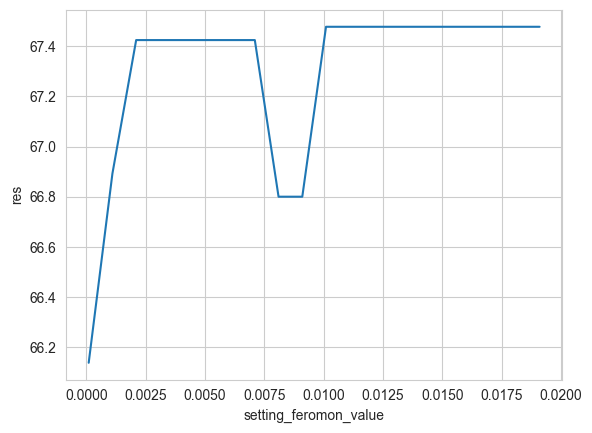

In [180]:
sns.set_style("whitegrid")
sns.lineplot(data={'setting_feromon_value': n_fmu*100, 'res': [sum(i[0]) for i in res]}, x="setting_feromon_value", y="res")
# sns.lineplot(data={'count': list(range(25, 100, 5)), 'res': [sum(h_mean) for i in res]}, x="count", y="res")

In [174]:
way = Dijkstra(100, 1, feromon_map*(-1))[1]
ways = np.array(list(zip(way[:-2], way[1:])))

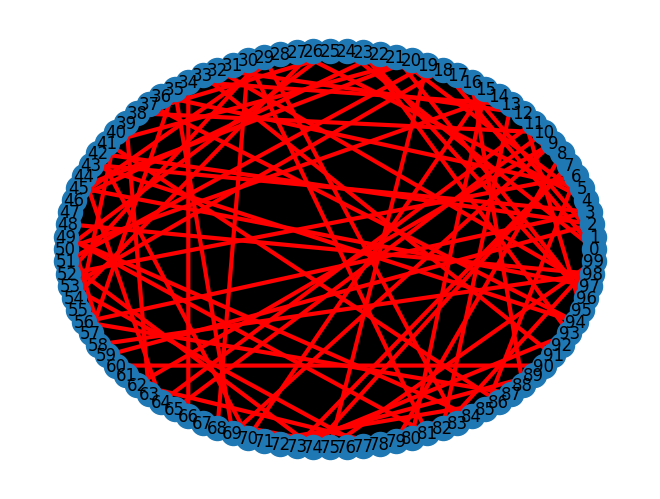

In [175]:
K1 = nx.Graph()

for start, end, length in edges:
    K1.add_edge(start, end, length=length)

nx.draw_circular(K1, with_labels = True)
nx.draw_networkx_edges(K1, nx.circular_layout(K1), edgelist=ways, edge_color='r', arrows=True, width=3)

In [176]:
distance = []
for i in ways:
    distance.append(distance_map[i[0], i[1]])
sum(distance)

49.39447630746986

In [177]:
h_mark = []
h_mean = []
h_max = []
w_mark = []
w_mean = []
w_max = []
for i in distance_map:
    w_mark.append(i[i != -np.inf].min())
    w_mean.append(i[i != -np.inf].mean())
    h_max.append(i[i != -np.inf].max())
for i in distance_map:
    h_mark.append(i[i != -np.inf].min())
    h_mean.append(i[i != -np.inf].mean())
    w_max.append(i[i != -np.inf].max())

sum(h_mark), sum(w_mark), sum(h_mean), sum(w_mean), sum(h_max), sum(w_max)

(5.917550871822761,
 5.917550871822761,
 49.914419086630495,
 49.914419086630495,
 93.62039695327609,
 93.62039695327609)